# Synthesis

This is an example of how to use the Synthesis tool.

We perform synthesis on the Air Quality dataset.

In [1]:
import os
from pathlib import Path

In [2]:
BASE_URL = "http://127.0.0.1:8000"

In [3]:
import json

import httpx
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
SYNTHEFY_PACKAGE_BASE = os.environ.get("SYNTHEFY_PACKAGE_BASE", "/home/synthefy/synthefy-package")

Setup Client

In [4]:
client = httpx.Client(base_url=BASE_URL, timeout=120.0)

Setup your input data for Synthesis

For Synthesis, only the meta-data conditions need to be passed in. 

For reference, the time-series cols are as follows:

In [5]:
time_series_cols = [
    "PM2.5",
    "PM10",
    "SO2",
    "NO2",
    "CO",
    "O3"
]

The meta-data cols are divided into two categories: discrete and continuous.

Discrete:

In [6]:
discrete_cols = ["wd",]

Continuous:

In [7]:
continuous_cols = [
    "TEMP",
    "PRES",
    "DEWP",
    "RAIN",
    "WSPM"
]

There are also group_labels, which can be thought of as 'artificial' discrete conditions

In [8]:
group_labels = [
    "station",
]

In my case, I'm going to get data from a csv I have handy.

In [9]:
air_quality_df = pd.read_csv(f"{SYNTHEFY_PACKAGE_BASE}/examples/air_quality_data_window_metadata_only.csv")
air_quality_df = air_quality_df.drop(columns=["Unnamed: 0",])
air_quality_df

,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date_time
0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...
91,10.9,1016.6,-10.6,0.0,SW,3.5,Aotizhongxin,2013-03-04 19:00:00
92,9.9,1016.9,-10.3,0.0,SSW,3.1,Aotizhongxin,2013-03-04 20:00:00
93,8.4,1016.9,-10.0,0.0,SSW,2.1,Aotizhongxin,2013-03-04 21:00:00
94,8.6,1016.3,-9.9,0.0,SSW,2.4,Aotizhongxin,2013-03-04 22:00:00


In [10]:
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TEMP       96 non-null     float64
 1   PRES       96 non-null     float64
 2   DEWP       96 non-null     float64
 3   RAIN       96 non-null     float64
 4   wd         96 non-null     object 
 5   WSPM       96 non-null     float64
 6   station    96 non-null     object 
 7   date_time  96 non-null     object 
dtypes: float64(5), object(3)
memory usage: 6.1+ KB


You can also setup your own df and populate it

In [11]:
air_quality_df_dtypes = air_quality_df.dtypes

In [12]:
empty_air_quality_df = pd.DataFrame({col: pd.Series(dtype=dt) for col, dt in air_quality_df_dtypes.items()})

In [13]:
empty_air_quality_df['TEMP'] = 1.1
empty_air_quality_df['PRES'] = 1023.2
empty_air_quality_df['DEWP'] = -18.2
empty_air_quality_df['RAIN'] = 0.0
empty_air_quality_df['wd'] = "NNW"
empty_air_quality_df['WSPM'] = 5.6
empty_air_quality_df['station'] = "Aotizhongxin"

Convert this df to a json

In [14]:
json_data_for_stream = air_quality_df.to_json()
json_data_for_stream

'{"TEMP":{"0":-0.7,"1":-1.1,"2":-1.1,"3":-1.4,"4":-2.0,"5":-2.2,"6":-2.6,"7":-1.6,"8":0.1,"9":1.2,"10":1.9,"11":2.9,"12":3.9,"13":5.3,"14":6.0,"15":6.2,"16":5.9,"17":4.3,"18":3.1,"19":2.3,"20":1.7,"21":0.6,"22":0.9,"23":-0.2,"24":-0.4,"25":-1.0,"26":-1.5,"27":-1.4,"28":-1.5,"29":-1.8,"30":-2.5,"31":-1.7,"32":-0.4,"33":0.6,"34":1.7,"35":2.2,"36":2.7,"37":3.3,"38":3.8,"39":3.9,"40":3.5,"41":2.2,"42":1.2,"43":1.5,"44":1.2,"45":0.6,"46":-0.6,"47":-0.8,"48":-1.4,"49":-2.0,"50":-2.8,"51":-2.6,"52":-4.3,"53":-5.6,"54":-5.8,"55":-3.1,"56":0.7,"57":3.5,"58":6.5,"59":11.4,"60":13.8,"61":16.0,"62":16.7,"63":16.9,"64":16.4,"65":13.1,"66":8.7,"67":12.2,"68":11.7,"69":5.3,"70":3.1,"71":5.2,"72":7.7,"73":8.2,"74":8.1,"75":7.2,"76":6.0,"77":2.7,"78":3.8,"79":6.5,"80":9.0,"81":10.6,"82":11.9,"83":13.1,"84":14.2,"85":15.3,"86":15.2,"87":15.3,"88":14.5,"89":12.7,"90":11.6,"91":10.9,"92":9.9,"93":8.4,"94":8.6,"95":7.7},"PRES":{"0":1023.0,"1":1023.2,"2":1023.5,"3":1024.5,"4":1025.2,"5":1025.6,"6":1026.5,"7

Now query the API

In [15]:
stream_synthesis_response = client.post(
    "/api/synthesis/air_quality/stream", json=json.loads(json_data_for_stream)
)

Examine the response

In [16]:
if stream_synthesis_response.status_code != 200:
    print(f"Error: {stream_synthesis_response.text}")
else:
    print(f"Success: Code={stream_synthesis_response.status_code}\n")

Success: Code=200



We now have a response object.

In [17]:
stream_synthesis_response.json()

{'NO2_synthetic': {'0': 44.18952941894531,
  '1': 42.97989273071289,
  '2': 26.52484130859375,
  '3': 34.20814514160156,
  '4': 21.482820510864258,
  '5': 24.700607299804688,
  '6': 49.740604400634766,
  '7': 45.78519058227539,
  '8': 53.228675842285156,
  '9': 64.93335723876953,
  '10': 53.70378112792969,
  '11': 39.751319885253906,
  '12': 32.785888671875,
  '13': 24.471269607543945,
  '14': 14.96893310546875,
  '15': 35.788211822509766,
  '16': 59.02653121948242,
  '17': 51.19279098510742,
  '18': 49.802268981933594,
  '19': 58.0946159362793,
  '20': 48.14023208618164,
  '21': 62.36383819580078,
  '22': 58.627323150634766,
  '23': 62.486446380615234,
  '24': 67.890869140625,
  '25': 61.65122985839844,
  '26': 52.5732307434082,
  '27': 39.56423568725586,
  '28': 35.39579772949219,
  '29': 17.326580047607422,
  '30': 20.4412784576416,
  '31': 15.543190002441406,
  '32': 40.75176239013672,
  '33': 38.34527587890625,
  '34': 61.85840606689453,
  '35': 41.95161819458008,
  '36': 36.22464

Let's try it again, this time by changing the wind direction in the data to always be "NNW"

In [18]:
air_quality_df['wd'] = "NNW"

Make the Query

In [19]:
stream_synthesis_response = client.post(
    "/api/synthesis/air_quality/stream", json=json.loads(air_quality_df.to_json())
)
if stream_synthesis_response.status_code != 200:
    print(f"Error: {stream_synthesis_response.text}")
else:
    print(f"Success: Code={stream_synthesis_response.status_code}\n")

Success: Code=200



Visualize the results; only the time-series columns are returned

In [20]:
df = pd.read_json(json.dumps(stream_synthesis_response.json()))
df.info(); df

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   NO2_synthetic    96 non-null     float64       
 1   O3_synthetic     96 non-null     float64       
 2   CO_synthetic     96 non-null     float64       
 3   date_time        96 non-null     datetime64[ns]
 4   SO2_synthetic    96 non-null     float64       
 5   PM10_synthetic   96 non-null     float64       
 6   PM2.5_synthetic  96 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 6.0 KB


/tmp/ipykernel_1031368/3751782356.py:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(json.dumps(stream_synthesis_response.json()))


,NO2_synthetic,O3_synthetic,CO_synthetic,date_time,SO2_synthetic,PM10_synthetic,PM2.5_synthetic
0,28.318583,189.796555,471.647217,2013-03-01 00:00:00,219.201187,385.279602,13.027219
1,25.390827,274.646088,466.982239,2013-03-01 01:00:00,216.357239,826.219299,28.461851
2,10.703091,569.710449,764.982239,2013-03-01 02:00:00,169.231918,687.952148,38.148666
3,18.944799,514.948792,195.018692,2013-03-01 03:00:00,35.342625,467.171143,-2.904154
4,9.602272,432.177856,95.138924,2013-03-01 04:00:00,-6.017029,273.666748,-26.612658
...,...,...,...,...,...,...,...
91,26.171444,216.418686,70.669319,2013-03-04 19:00:00,63.102215,-106.027313,-5.872767
92,32.844757,261.413666,-48.313343,2013-03-04 20:00:00,102.946228,-86.805695,-6.889147
93,43.815060,528.549011,-228.601669,2013-03-04 21:00:00,132.796478,-77.919754,5.048711
94,47.910126,612.509033,22.360849,2013-03-04 22:00:00,175.589447,-63.637238,-15.554645


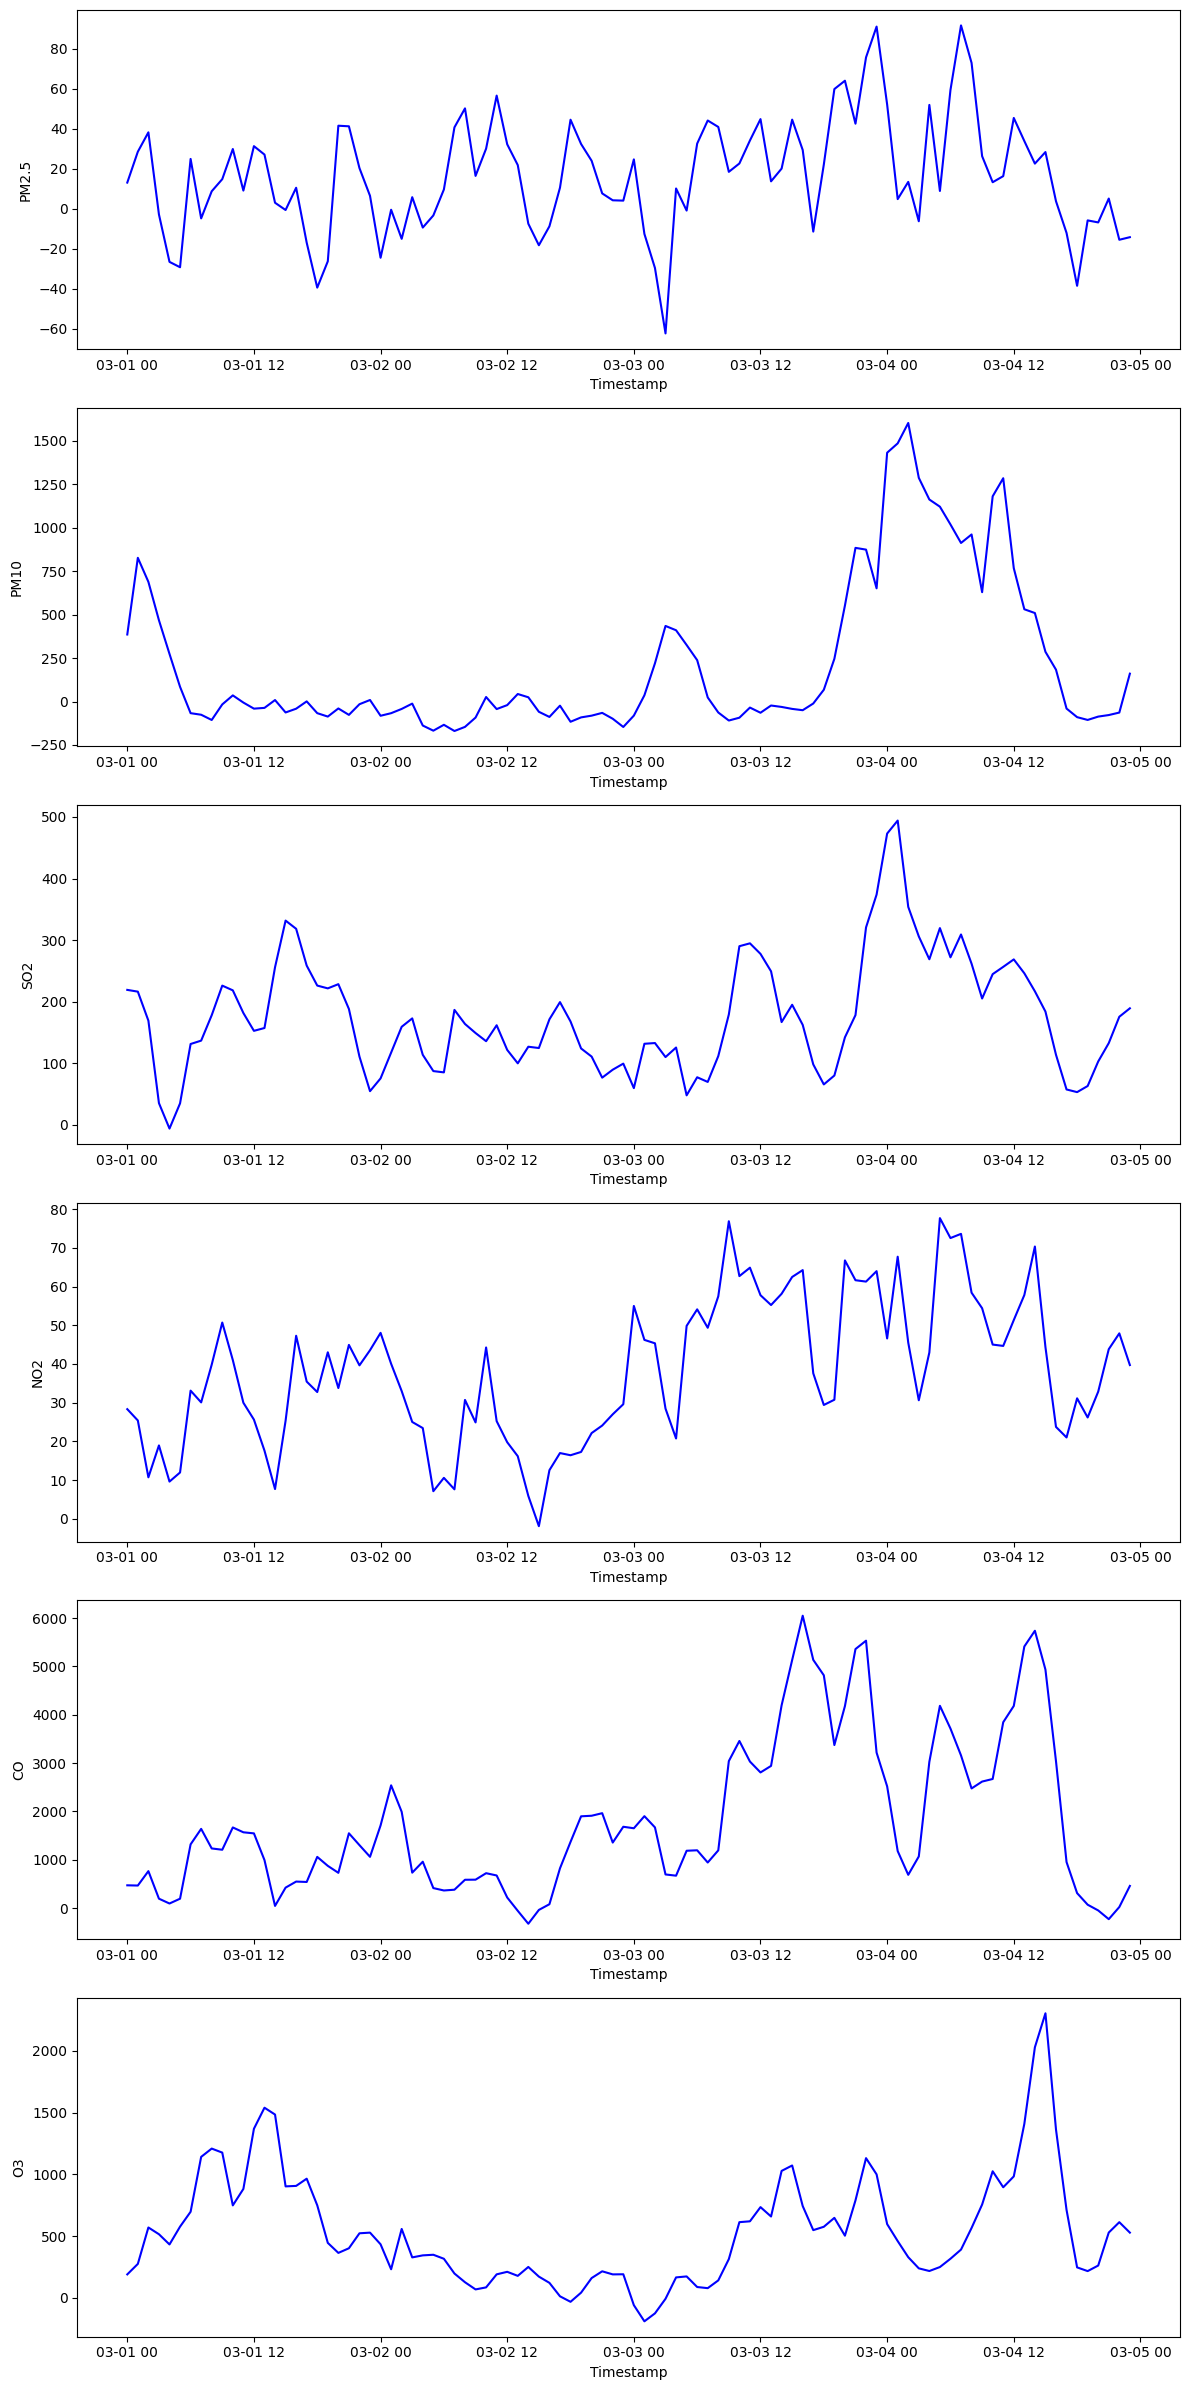

In [21]:
timestamps_col = ["date_time",]

# Create a subplot for each timeseries
fig, axes = plt.subplots(
    len(time_series_cols), 1, figsize=(12, 4 * len(time_series_cols))
)

for idx, time_series_col in enumerate(time_series_cols):
    # Plot time series
    axes[idx].plot(df[timestamps_col], df[f"{time_series_col}_synthetic"], "b-")

    # Set labels
    axes[idx].set_xlabel("Timestamp")
    axes[idx].set_ylabel(time_series_col)

plt.tight_layout()